In [1]:
import os
import tarfile
import pandas as pd
import numpy as np
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = os.path.join('datasets', 'houses')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

In [3]:
def fetch_data(url=HOUSING_URL, path=HOUSING_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    tgz_path = os.path.join(path, 'housing.tgz')
    urllib.request.urlretrieve(url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=path)
    housing_tgz.close()
    
def load_data(path=HOUSING_PATH):
    return pd.read_csv(os.path.join(path, 'housing.csv'))

In [4]:
fetch_data()
df = load_data()
print(df.head())
print(df.info())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

In [5]:
# getting all unique values of ocean_proximity column
print(df.ocean_proximity.unique())
print(df.ocean_proximity.value_counts())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


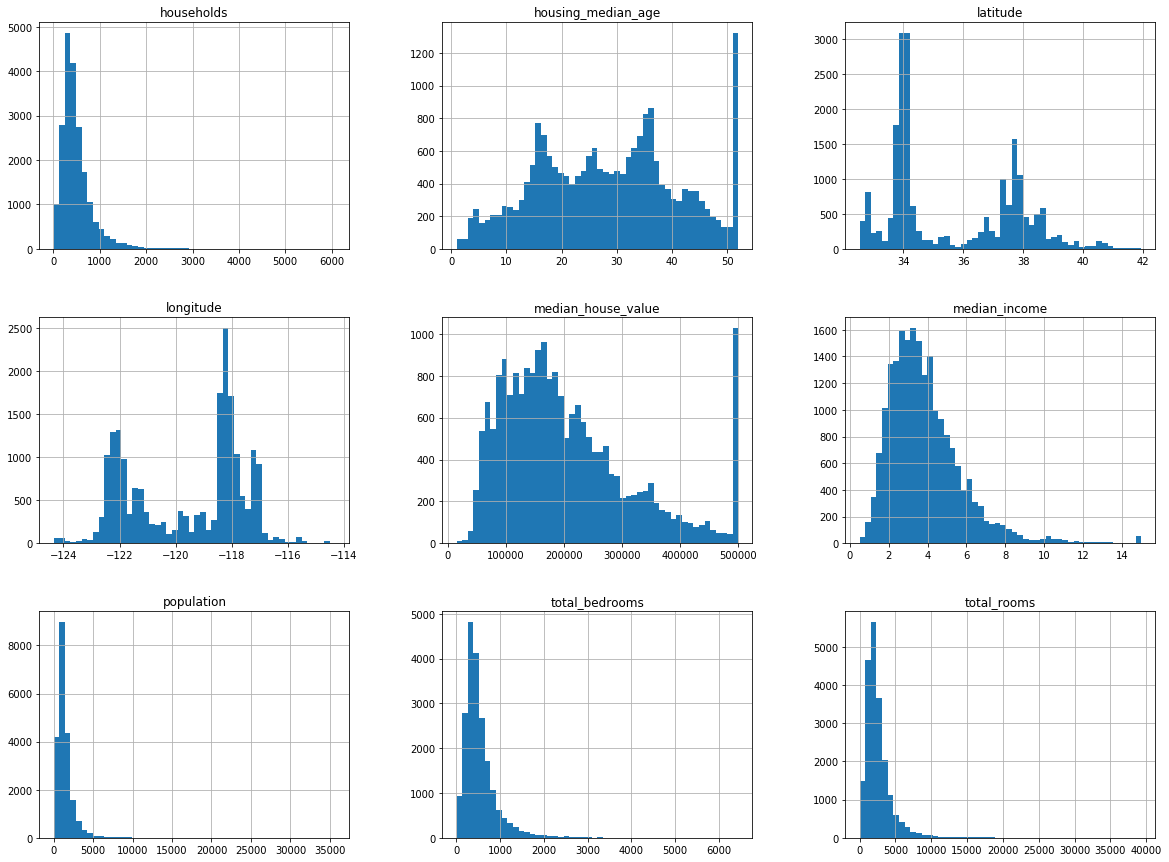

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
df['income_cat'] = np.ceil(df.median_income / 1.5)
df['income_cat'].where(df['income_cat'] < 5, 5.0, inplace=True)
df.income_cat.value_counts()/len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

    for set_ in (strat_train_set, strat_test_set):
        set_.drop('income_cat', axis=1, inplace=True)

In [9]:
housing = strat_train_set.copy()

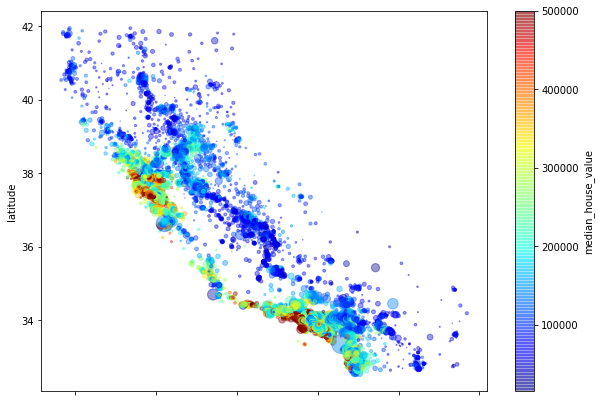

In [10]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=df['population']/100, c='median_house_value', cmap=plt.get_cmap('jet'), figsize=(10,7))

In [11]:
# The most correlated features
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D0D1ACEB8>,
      dtype=object)

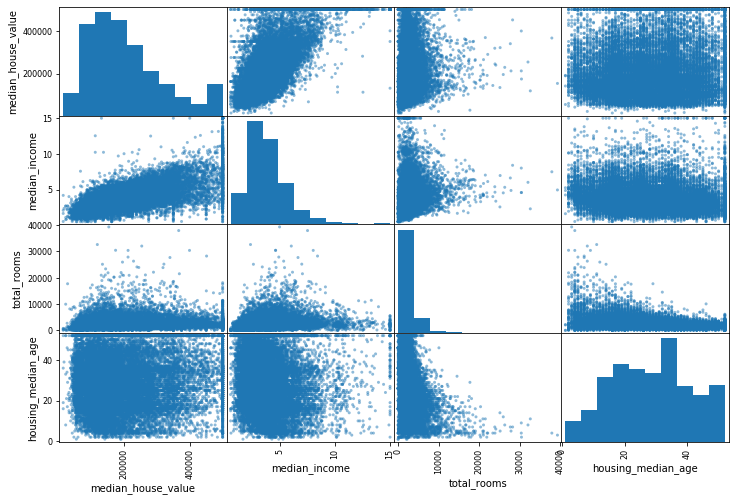

In [12]:
# Plotting correlation

from pandas.plotting import scatter_matrix
corr_attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(df[corr_attributes], figsize=(12,8))

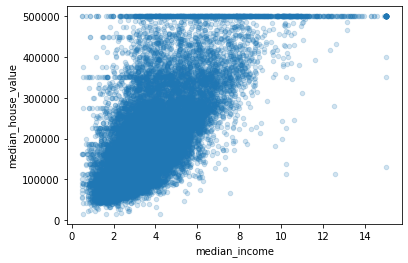

In [13]:
df.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2)

In [14]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [15]:
# df['rooms_per_household'] = df.total_rooms / df.households
# df['bedrooms_per_rooms'] = df.total_bedrooms / df.total_rooms
# df['mean_household_count'] = df.population / df.households

In [16]:
# Correlations between new features

corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [17]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set.median_house_value.copy()

In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [19]:
# replace NaN values with the median

median = df.total_bedrooms.median()
df.total_bedrooms = df.total_bedrooms.fillna(median)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  income_cat          20640 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB
None


In [20]:
# Universal solution (all-purpose)
housing_num = housing.drop('ocean_proximity', axis=1)

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(housing_num)

print(imp.statistics_)
print(housing_num.median().values)

X = imp.transform(housing_num)


[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [21]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [22]:
# 2 methods of transforming categorical(text) data

# df['ocean_proximity_cat'] = df.ocean_proximity.factorize()[0]
# print(df.ocean_proximity_cat)

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
ocean_proximity_cat = encoder.fit_transform(df.ocean_proximity)
ocean_proximity_cat

array([3, 3, 3, ..., 1, 1, 1])

In [23]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(ocean_proximity_cat.reshape(-1,1))
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [24]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
ocean_proximity_cat_1hot = encoder.fit_transform(ocean_proximity_cat)
ocean_proximity_cat_1hot

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        Pokoje_na_rodzine = X[:, rooms_ix] / X[:, household_ix]
        Populacja_na_rodzine = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            Sypialnie_na_pokoje = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, Pokoje_na_rodzine, Populacja_na_rodzine, Sypialnie_na_pokoje]
        else:
            return np.c_[X, Pokoje_na_rodzine, Populacja_na_rodzine]
        
        
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_labels):
        self.attribute_labels = attribute_labels
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_labels].values

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                        ('imputer', SimpleImputer(strategy='median')),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler())
                        ])

cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)),
                        ('encoder', OneHotEncoder())
                        ])

In [27]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

housing_prepared = full_pipeline.fit_transform(housing).toarray()
housing_prepared.shape

(16512, 16)

In [28]:
def display_scores(scores):
#     print(np.sqrt(mean_squared_error(scores, housing_labels)))
    print('Results:', scores)
    print('Average:', scores.mean())
    print('Std:', scores.std())

In [29]:
# # Creating a model and testing its performance

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
    
# forest_reg = RandomForestRegressor()
# forest_reg.fit(housing_prepared, housing_labels)

# scores = cross_val_score(forest_reg, housing_prepared, housing_labels, cv=10, scoring='neg_mean_squared_error')

# display_scores(np.sqrt(-scores))


In [30]:
# # Saving model to pickle file
# import pickle

# with open('model.pickle', 'wb') as file:
#     pickle.dump(forest_reg, file)    

In [31]:
# # Loading model

# model_in = open('model.pickle', 'rb')
# forest_reg = pickle.load(model_in)

In [32]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

forest_reg = RandomForestRegressor()

params = [
        {'n_estimators': [30, 40, 50, 60], 'max_features': [8, 9, 10, 11]},
        {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
        ]

grid_search = GridSearchCV(forest_reg, params, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)


print(grid_search.best_params_)
print(grid_search.best_estimator_)

50190.20914303407 {'max_features': 8, 'n_estimators': 30}
49967.61606571958 {'max_features': 8, 'n_estimators': 40}
49602.322920699786 {'max_features': 8, 'n_estimators': 50}
49461.03385052833 {'max_features': 8, 'n_estimators': 60}
50026.12329024696 {'max_features': 9, 'n_estimators': 30}
49961.57341441516 {'max_features': 9, 'n_estimators': 40}
49573.21908736283 {'max_features': 9, 'n_estimators': 50}
49491.20499791351 {'max_features': 9, 'n_estimators': 60}
50324.85154091297 {'max_features': 10, 'n_estimators': 30}
49921.79562084663 {'max_features': 10, 'n_estimators': 40}
49813.46766108252 {'max_features': 10, 'n_estimators': 50}
49572.973863797924 {'max_features': 10, 'n_estimators': 60}
50375.2010999089 {'max_features': 11, 'n_estimators': 30}
49961.68504521634 {'max_features': 11, 'n_estimators': 40}
50077.1293047061 {'max_features': 11, 'n_estimators': 50}
49931.09044670002 {'max_features': 11, 'n_estimators': 60}
62885.477197934226 {'bootstrap': False, 'max_features': 2, 'n_es

In [33]:
# Saving model to pickle file
import pickle

with open('model.pickle', 'wb') as file:
    pickle.dump(grid_search, file)   

In [34]:
# Loading model

model_in = open('model.pickle', 'rb')
model = pickle.load(model_in)

## Feature importances

In [35]:
feature_importances = model.best_estimator_.feature_importances_

extra_attribs = ['Rooms_per_household', 'Population_per_household', 'Bedrooms_per_rooms']
cat_one_attribs = list(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'])
attributes = num_attribs + extra_attribs + cat_one_attribs

importance = sorted(zip(feature_importances, attributes), reverse=True)
importance

[(0.3573540158780536, 'median_income'),
 (0.16614388081716355, 'INLAND'),
 (0.10922012547924545, 'Population_per_household'),
 (0.07297138236904156, 'longitude'),
 (0.06462387144055011, 'latitude'),
 (0.06421189790983631, 'Bedrooms_per_rooms'),
 (0.05325392063910988, 'Rooms_per_household'),
 (0.042132466449394716, 'housing_median_age'),
 (0.015188525319453158, 'population'),
 (0.014983864721853282, 'total_rooms'),
 (0.01429166170174755, 'total_bedrooms'),
 (0.01369590303483459, 'households'),
 (0.00627522200357288, '<1H OCEAN'),
 (0.0035033817701979673, 'NEAR OCEAN'),
 (0.0020621145768347734, 'NEAR BAY'),
 (8.776588911056216e-05, 'ISLAND')]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

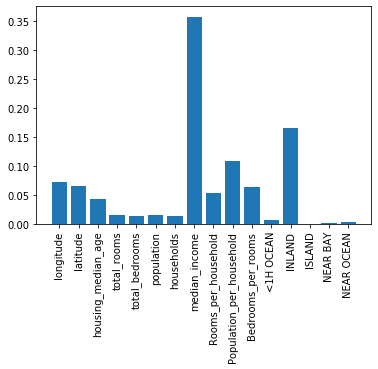

In [36]:
plt.bar(attributes, feature_importances)
plt.xticks(rotation=90)

In [37]:
# Testing final model

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value']

X_test_prepared = full_pipeline.transform(X_test)

y_pred = model.predict(X_test_prepared)

final_rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
final_rmse

47349.62099179207

In [50]:
import eli5
from eli5.sklearn import PermutationImportance

imp = PermutationImportance(model, random_state=0).fit(housing_prepared, housing_labels)
eli5.show_weights(imp, feature_names = attributes)

Weight,Feature
8328321526.1198 ± 74907443.2329,median_income
3285103031.5546 ± 53881037.3685,INLAND
3211167084.6569 ± 75694865.5660,Population_per_household
2794554314.7917 ± 44548334.2363,longitude
2466572978.3621 ± 68949640.5750,latitude
1103473834.2365 ± 51151160.8180,housing_median_age
744631824.7726 ± 16391945.1651,Rooms_per_household
687591839.4797 ± 19035924.7445,Bedrooms_per_rooms
193481617.7462 ± 3809639.3235,total_rooms
189668227.8402 ± 3203136.6827,population


In [38]:
# !git add *

In [39]:
# !git commit -m "project finished"

In [40]:
# !git push -u origin master

## Testing SVR

In [52]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

params = {'kernel':['linear', 'rbf'],
          'C': [0.1, 1, 3, 10, 20, 50, 100],
          'gamma':[0.01, 0.1, 0.5, 1, 2]
         }

svr = SVR()

rand_model = RandomizedSearchCV(svr, params, cv=5, scoring='neg_mean_squared_error')

rand_model.fit(housing_prepared, housing_labels)

rand_model.best_params_

{'kernel': 'linear', 'gamma': 0.5, 'C': 50}